In [26]:
import networkx as nx
G = nx.Graph() # Undirected graph

In [27]:
country_to_continent = {}
country_to_category = {}

skip_header = True

with open("paisesTEG.csv") as f:
    for line in f:
        if skip_header:
            skip_header = False
            continue
            
        country, continent, category = line.rstrip().split(",")
        country_to_continent[country] = continent
        country_to_category[country] = category


In [28]:
country_to_continent

{'Canada': 'North America',
 'Yukon': 'North America',
 'Alaska': 'North America',
 'Greenland': 'North America',
 'Oregon': 'North America',
 'California': 'North America',
 'Mexico': 'North America',
 'New York (state)|New York': 'North America',
 'Newfoundland (island)|Terranova': 'North America',
 'Labrador': 'North America',
 'Great Britain': 'Europe',
 'Iceland': 'Europe',
 'Spain': 'Europe',
 'France': 'Europe',
 'Germany': 'Europe',
 'Italy': 'Europe',
 'Poland': 'Europe',
 'Russia': 'Europe',
 'Sweden': 'Europe',
 'Arabia': 'Asia',
 'Aral Kazakhstan|Aral': 'Asia',
 'China': 'Asia',
 'India': 'Asia',
 'Iran': 'Asia',
 'Tartary': 'Asia',
 'Taymyr Autonomous Okrug|Taymyr': 'Asia',
 'Japan': 'Asia',
 'Kamchatka': 'Asia',
 'Siberia': 'Asia',
 'Mongolia': 'Asia',
 'Gobi': 'Asia',
 'Malaysia': 'Asia',
 'Turkey': 'Asia',
 'Israel': 'Asia',
 'Argentina': 'South America',
 'Brazil': 'South America',
 'Peru': 'South America',
 'Colombia': 'South America',
 'Chile': 'South America',
 'Uru

In [29]:
country_to_category

{'Canada': 'canon',
 'Yukon': 'globo',
 'Alaska': 'barco',
 'Greenland': 'globo',
 'Oregon': 'canon',
 'California': 'canon',
 'Mexico': 'canon',
 'New York (state)|New York': 'barco',
 'Newfoundland (island)|Terranova': 'canon',
 'Labrador': 'canon',
 'Great Britain': 'barco',
 'Iceland': 'barco',
 'Spain': 'globo',
 'France': 'globo',
 'Germany': 'barco',
 'Italy': 'globo',
 'Poland': 'canon',
 'Russia': 'globo',
 'Sweden': 'barco',
 'Arabia': 'canon',
 'Aral Kazakhstan|Aral': 'canon',
 'China': 'barco',
 'India': 'globo',
 'Iran': 'globo',
 'Tartary': 'canon',
 'Taymyr Autonomous Okrug|Taymyr': 'comodin',
 'Japan': 'canon',
 'Kamchatka': 'globo',
 'Siberia': 'barco',
 'Mongolia': 'barco',
 'Gobi': 'globo',
 'Malaysia': 'canon',
 'Turkey': 'barco',
 'Israel': 'barco',
 'Argentina': 'comodin',
 'Brazil': 'barco',
 'Peru': 'barco',
 'Colombia': 'globo',
 'Chile': 'globo',
 'Uruguay': 'globo',
 'Sahara': 'canon',
 'Ethiopia': 'globo',
 'Egypt': 'globo',
 'Madagascar': 'barco',
 'Zaire':

In [30]:
skip_header = True

with open("paisesFronteraTeg.csv") as f:
    for line in f:
        if skip_header:
            skip_header = False
            continue
        
        c1,c2, _ = line.rstrip().split(",")
        
        if c1 not in G:
            G.add_node(c1, continent=country_to_continent[c1], category=country_to_category[c1], name=c1)
            
        if c2 not in G:
            G.add_node(c2, continent=country_to_continent[c2], category=country_to_category[c2], name=c2)
        
        G.add_edge(c1, c2)

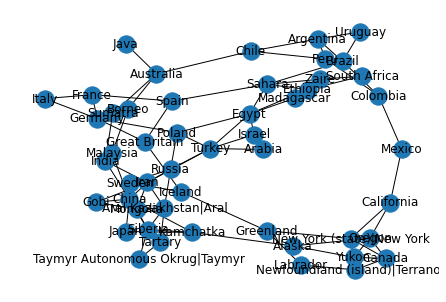

In [31]:
nx.draw(G, with_labels=True)

In [32]:
def contar_aristas(grafo):
    contador = 0
    for v in grafo:
        contador += len(list(grafo.neighbors(v)))
    return contador if nx.is_directed(grafo) else contador // 2


def proporcion_cruzan_campo(grafo, mapper=None):
    """
    :param grafo:
    :param mapper: un mapper de vertice a un tipo (por defecto, grafo[v])
    :return: devuelve la proporcion real que se obtiene de cruces respecto del total de aristas
    """
    aristas_totales = contar_aristas(grafo)
    cruzan_bloque = 0
    visitados = set()
    mapper = mapper if mapper is not None else (lambda k: grafo[k]["type"])

    for v in grafo:
        for w in grafo.neighbors(v):
            if not nx.is_directed(grafo) and w in visitados:
                continue
            if mapper(v) != mapper(w):
                cruzan_bloque += 1
        visitados.add(v)
    return cruzan_bloque / aristas_totales


def proporcion_cruzan_campo_de_tipo(grafo, tipo, mapper=None):
    """
    :param grafo:
    :param tipo: por el cual se quiere calcular especificamente
    :param mapper: un mapper de vertice a un tipo (por defecto, grafo[v])
    :return: devuelve la proporcion real que se obtiene de cruces respecto del total de aristas,
    de un tipo en particular (para ver si hay homofilia/segregacion por parte de un grupo en particular)
    """
    cruzan_bloque = 0
    visitados = set()
    aristas = 0
    mapper = mapper if mapper is not None else (lambda k: grafo[k]["type"])

    for v in grafo:
        if mapper(v) != tipo:
            continue
        for w in grafo.neighbors(v):
            aristas += 1
            if mapper(v) != mapper(w):
                cruzan_bloque += 1
        visitados.add(v)
    return cruzan_bloque / aristas


def proporcion_por_tipo(grafo, mapper=None):
    """
    :param grafo:
    :param mapper: un mapper de vertice a un tipo (por defecto, grafo[v])
    :return: la proporcion que hay de cada tipo
    """
    mapper = mapper if mapper is not None else (lambda k: grafo[k]["type"])
    cantidades = {}
    for v in grafo:
        cantidades[mapper(v)] = cantidades.get(mapper(v), 0) + 1
    props = {}
    for c in cantidades:
        props[c] = cantidades[c] / len(grafo)
    return props

In [33]:
proporcion_por_tipo(G, lambda k: G.nodes[k]["continent"])

{'North America': 0.2,
 'Asia': 0.3,
 'Europe': 0.18,
 'South America': 0.12,
 'Africa': 0.12,
 'Oceania': 0.08}

In [34]:
proporcion_cruzan_campo(G, lambda k: G.nodes[k]["continent"])

0.16853932584269662

In [35]:
print("Oceania: {}".format(proporcion_cruzan_campo_de_tipo(G, "Oceania", lambda k: G.nodes[k]["continent"])))
print("Asia: {}".format(proporcion_cruzan_campo_de_tipo(G, "Asia", lambda k: G.nodes[k]["continent"])))
print("North America: {}".format(proporcion_cruzan_campo_de_tipo(G, "North America", lambda k: G.nodes[k]["continent"])))
print("Europe: {}".format(proporcion_cruzan_campo_de_tipo(G, "Europe", lambda k: G.nodes[k]["continent"])))
print("South America: {}".format(proporcion_cruzan_campo_de_tipo(G, "South America", lambda k: G.nodes[k]["continent"])))
print("Africa: {}".format(proporcion_cruzan_campo_de_tipo(G, "Africa", lambda k: G.nodes[k]["continent"])))

Oceania: 0.3333333333333333
Asia: 0.14285714285714285
North America: 0.09090909090909091
Europe: 0.2413793103448276
South America: 0.14285714285714285
Africa: 0.21739130434782608


In [36]:
proporcion_por_tipo(G, lambda k: G.nodes[k]["category"])

{'canon': 0.32, 'barco': 0.32, 'globo': 0.32, 'comodin': 0.04}

In [37]:
proporcion_cruzan_campo(G, lambda k: G.nodes[k]["category"])

0.7415730337078652

In [38]:
print("canon: {}".format(proporcion_cruzan_campo_de_tipo(G, "canon", lambda k: G.nodes[k]["category"])))
print("barco: {}".format(proporcion_cruzan_campo_de_tipo(G, "barco", lambda k: G.nodes[k]["category"])))
print("globo: {}".format(proporcion_cruzan_campo_de_tipo(G, "globo", lambda k: G.nodes[k]["category"])))
print("comodin: {}".format(proporcion_cruzan_campo_de_tipo(G, "comodin", lambda k: G.nodes[k]["category"])))

canon: 0.72
barco: 0.7230769230769231
globo: 0.7543859649122807
comodin: 1.0


In [39]:
skip_header = True
country_real_to_continent = {}
with open("paisesRealesConContinente.csv", encoding="utf-8") as f:
    for line in f:
        if skip_header:
            skip_header = False
            continue
        country, continent = line.rstrip().split(",")
        country_real_to_continent[country] = continent



In [40]:
country_real_to_continent

{'Afganistán': 'Asia',
 'Albania': 'Europa',
 'Alemania': 'Europa',
 'Argelia': 'África',
 'Andorra': 'Europa',
 'Angola': 'África',
 'Anguila': 'América',
 'Antártida': 'Antártida',
 'Antigua y Barbuda': 'América',
 'Antillas Neerlandesas': 'América',
 'Arabia Saudita': 'Asia',
 'Argentina': 'América',
 'Armenia': 'Asia',
 'Aruba': 'América',
 'Australia': 'Oceanía',
 'Austria': 'Europa',
 'Azerbaiyán': 'Asia',
 'Bélgica': 'Europa',
 'Bahamas': 'América',
 'Bahrein': 'Asia',
 'Bangladés': 'Asia',
 'Barbados': 'América',
 'Belice': 'América',
 'Benín': 'África',
 'Bután': 'Asia',
 'Bielorrusia': 'Europa',
 'Birmania': 'Asia',
 'Bolivia': 'América',
 'Bosnia-Herzegovina': 'Europa',
 'Botsuana': 'África',
 'Brasil': 'América',
 'Brunéi': 'Asia',
 'Bulgaria': 'Europa',
 'Burkina Faso': 'África',
 'Burundi': 'África',
 'Cabo Verde': 'África',
 'Camboya': 'Asia',
 'Camerún': 'África',
 'Canadá': 'América',
 'Chad': 'África',
 'Chile': 'América',
 'China': 'Asia',
 'Chipre': 'Asia',
 'Ciudad

In [41]:
translate_teg_country_to_spanish = {'Canada': 'Canadá',
 'Yukon': 'Yukon',
 'Alaska': 'Alaska',
 'Greenland': 'Groenlandia',
 'Oregon': 'Oregón',
 'California': 'California',
 'Mexico': 'México',
 'New York (state)|New York': 'Nueva York',
 'Newfoundland (island)|Terranova': 'Terranova',
 'Labrador': 'Labrador',
 'Great Britain': 'Reino Unido',
 'Iceland': 'Islandia',
 'Spain': 'España',
 'France': 'Francia',
 'Germany': 'Alemania',
 'Italy': 'Italia',
 'Poland': 'Polonia',
 'Russia': 'Rusia',
 'Sweden': 'Suiza',
 'Arabia': 'Arabia Saudita',
 'Aral Kazakhstan|Aral': 'Aral',
 'China': 'China',
 'India': 'India',
 'Iran': 'Irán',
 'Tartary': 'Tartaria',
 'Taymyr Autonomous Okrug|Taymyr': 'Taymir',
 'Japan': 'Japón',
 'Kamchatka': 'Kamchatka',
 'Siberia': 'Siberia',
 'Mongolia': 'Mongolia',
 'Gobi': 'Gobi',
 'Malaysia': 'Malasia',
 'Turkey': 'Turquía',
 'Israel': 'Israel',
 'Argentina': 'Argentina',
 'Brazil': 'Brasil',
 'Peru': 'Perú',
 'Colombia': 'Colombia',
 'Chile': 'Chile',
 'Uruguay': 'Uruguay',
 'Sahara': 'Sahara',
 'Ethiopia': 'Etiopía',
 'Egypt': 'Egipto',
 'Madagascar': 'Madagascar',
 'Zaire': 'Zaire',
 'South Africa': 'Sudáfrica',
 'Sumatra': 'Sumatra',
 'Borneo': 'Borneo',
 'Java': 'Java',
 'Australia': 'Australia'}

In [42]:
translate_continent_to_spanish = {
    'North America': 'América',
    'Asia': 'Asia',
    'Europe': 'Europa',
    'South America': 'América',
    'Africa': 'África',
    'Oceania': 'Oceanía'
}

In [43]:
continents_teg_country_different_than_real = []
non_real_teg_country = []

for teg_country in country_to_continent:
    spanish_name_country_teg = translate_teg_country_to_spanish[teg_country]
    
    if spanish_name_country_teg not in country_real_to_continent:
        non_real_teg_country.append(spanish_name_country_teg)
    elif country_real_to_continent[spanish_name_country_teg] != translate_continent_to_spanish[country_to_continent[teg_country]]:
        continents_teg_country_different_than_real.append(teg_country)

In [44]:
continents_teg_country_different_than_real

[]

In [45]:
non_real_teg_country

['Yukon',
 'Alaska',
 'Oregón',
 'California',
 'Nueva York',
 'Terranova',
 'Labrador',
 'Aral',
 'Tartaria',
 'Taymir',
 'Kamchatka',
 'Siberia',
 'Gobi',
 'Sahara',
 'Zaire',
 'Sumatra',
 'Borneo',
 'Java']

In [46]:
from graphrole import RecursiveFeatureExtractor, RoleExtractor

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def extract_roles_and_plot(G, title='',save = False ,file_name='', big=False):
    feature_extractor = RecursiveFeatureExtractor(G)
    features = feature_extractor.extract_features()
    role_extractor = RoleExtractor(n_roles=None)
    role_extractor.extract_role_factors(features)
    labels = {node: G.nodes()[node]['name'] for node in G.nodes()}

    available_colors = {'role_0':'#E9D758', 'role_1':'#297373', 'role_2':'#ff8552', 'role_3':'#888888', 'role_4':'#00aa00','role_5':'#aaaa00','role_6':'#aa0000' , 'role_7':'#0000aa'}
    
    colors = [available_colors[role_extractor.roles[node]] for node in G.nodes()]
    
    pos = nx.kamada_kawai_layout(G)
    if big:
        plt.figure(figsize=(15,15))
    else:
        plt.figure(figsize=(10,10))
    plt.title(title)

    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=colors, alpha=0.7, node_size=700, linewidths=2)
    nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    if save:
        plt.savefig(file_name, format = 'svg', dpi=300)

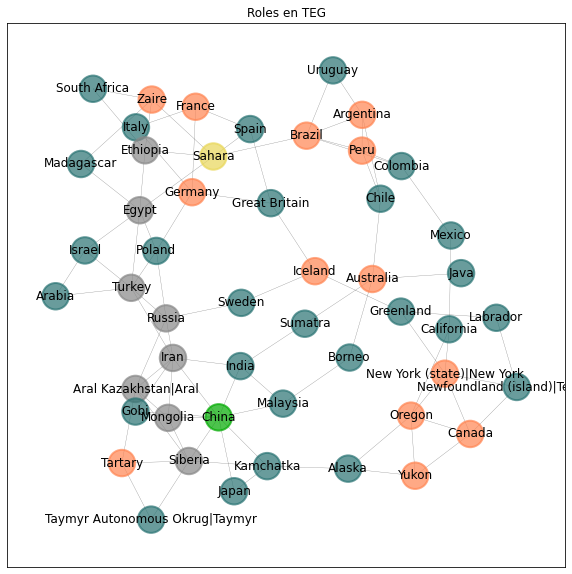

In [50]:
extract_roles_and_plot(G, title='Roles en TEG')